# **Amazon Fine food review dataset to predict the sentiment of food review**

# 1. Download the dataset and Create a dataframe named as food then check the head, info, and describe methods on created dataframe food.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/dataset/Reviews.csv'

In [ ]:
food = pd.read_csv(file_path)


In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
unique_scores = food['Score'].unique()
print("Unique Scores:", unique_scores)
print("Number of Unique Scores:", len(unique_scores))


Unique Scores: [5 1 4 2 3]
Number of Unique Scores: 5


In [ ]:
score_counts = food['Score'].value_counts()
print("Count of Each Unique Score:")
print(score_counts)


Count of Each Unique Score:
5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64


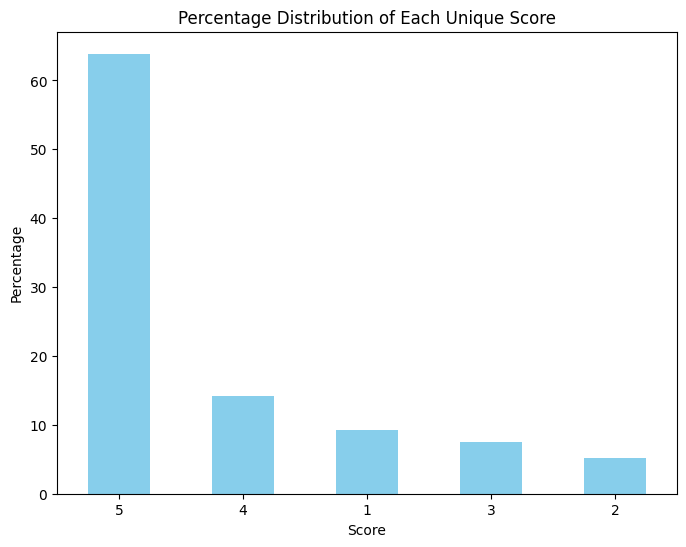

In [ ]:
import matplotlib.pyplot as plt

score_counts = food['Score'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
score_counts.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Each Unique Score')
plt.xlabel('Score')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


> We can see, this is a class im-balance dataset.

In [ ]:
food.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
food.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [ ]:
food.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

## Using 50% of the dataset with the same distribution of scores (Used 10% of the dataset because it is taking too much time to execute for 50% of the dataset)
>Stratified Sampling: Sample an equal percentage from each score category to maintain the distribution.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

random_seed = 42

# Performed stratified sampling to maintain the distribution
food, _ = train_test_split(food, test_size=0.9, stratify=food['Score'], random_state=random_seed)

# Reset the index of the final dataset
food.reset_index(drop=True, inplace=True)

# Display the shape of the sampled dataset
print("Shape of Sampled Dataset:", food.shape)

# Display the count of each unique score in the sampled dataset
print("Count of Each Unique Score in Sampled Dataset:")
print(food['Score'].value_counts())


Shape of Sampled Dataset: (56845, 10)
Count of Each Unique Score in Sampled Dataset:
5    36312
4     8065
1     5227
3     4264
2     2977
Name: Score, dtype: int64


In [ ]:
food

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,284990,B000HDKWZI,A2BL5ZPE65KTRN,WC,0,0,2,1278115200,Amazon sent the wrong dressing,Apparently I am not the first customer to have...
1,323738,B003A23HZK,A2IWARJINGEJUP,amsdragonfly,0,0,5,1341446400,Shepherd and Cattle Dog Love It!,We bought the large cube because of our 97lb. ...
2,273538,B001CCU8F2,A1KNF8V0TT4LW2,"W. Hoyt ""Pee Wee Shooter""",0,4,5,1318982400,Not difficult to get a refund if you were tric...,"First off I have no idea how good these ""pods""..."
3,481024,B000BTD0PC,A27R9FVHPIR7L3,High Hawk,1,1,5,1275955200,Great Smoked paprika,I use the La Tienda Smoked Paprikas to make gr...
4,40184,B0012YEKCM,A1DIGWR06FV84K,Yi Ruide,0,0,1,1344124800,It will be thrown away. Looks like a weed.,I must have gotten the scraps. My tree was ab...
...,...,...,...,...,...,...,...,...,...,...
56840,366821,B000GAT6MM,AB0VX6D37FZWT,"Intense4life ""Intense4life""",1,1,5,1284595200,No place else,This is the best price for hemp seed. I have ...
56841,427396,B001M074O2,A3RHF65R3UUIR6,Dede from NY,0,0,5,1329436800,deeeeeeeeeeee licious!!,These arrived fresh and have ordered 3 packs s...
56842,363878,B0036Z3UOE,A38B7MUWO2UPZE,T. Boone,5,5,4,1294790400,"A Pretty Decent Brown Basmati Rice, Especially...",I have used this Arrowhead Mills Brown Basmati...
56843,81357,B000I5FN7C,A396L7TAYK3LG1,dukie's mom,0,0,5,1211760000,YUMMY!!!!!,Dukie loves the sweet potato chicken wraps!!!<...


In [ ]:
food['Text'].iloc[0]

"Apparently I am not the first customer to have this experience.  I received 6 bottles of the Light Red Wine Vinaigrette instead of the Red Wine Vinaigrette Dressing and Marinade.  Not sure why Amazon can't send the right dressing."

# Question 2 & 3 combined together for better cleansing of the reviews.

# 2. Create another dataframe name called Review with Score and Text column. Perform pre-processing steps like Removing Punctuations, Numbers, and Special Characters, Stop Words in dataset.

# 3. Normalize review by using Stemming or Lemmatization.
> Here Lemmatization is used as it's very helpful to clean the data also

In [ ]:
review = food[['Score', 'Text']].copy()

In [ ]:
import pandas as pd
import spacy
import re

# Load spaCy
nlp = spacy.load("en_core_web_sm")

def remove_number(text):
    return re.sub(r'\d', '', text)

def remove_unwanted_patterns(text):
    unwanted_patterns = ['<br />', '""', '-', 'href', '<', '>', '/', ')', '(', '=','$','%','&']
    for pattern in unwanted_patterns:
        text = text.replace(pattern, '')
    return text

def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def remove_punctuation(text):
    doc = nlp(text)
    tokens_without_punct = [token.text for token in doc if not token.is_punct]
    return ' '.join(tokens_without_punct)

def remove_special_characters(text):
    return re.sub(r'^[^\w\s]*$', '', text)

def remove_stopwords(text):
    doc = nlp(text)
    tokens_without_stop = [token.text for token in doc if not nlp.vocab[token.text].is_stop]
    return ' '.join(tokens_without_stop)

def remove_double_quotes(text):
    return text.replace('"', '')

def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

def lemmatize_text(text):
    doc = nlp(text)
    tokens_without_stop = [token.lemma_ for token in doc if not (nlp.vocab[token.lemma_].is_stop or token.is_punct)]
    return ' '.join(tokens_without_stop)

def preprocess_text(text):

    # Convert to lowercase
    text = text.lower()

    # Remove numbers
    text = remove_number(text)

    # Remove unwanted patterns
    text = remove_unwanted_patterns(text)

    # Remove URLs
    text = remove_urls(text)

    # Lemmatize
    text = lemmatize_text(text)

    # Remove double quotes
    text = remove_double_quotes(text)

    # Remove extra spaces
    text = remove_extra_spaces(text)

    return text


# 4. Preprocessed text review should be included in the Review data frame as cleaned_review.

In [ ]:
review['cleaned_review'] = review['Text'].apply(preprocess_text)

print("Head of the DataFrame after Comprehensive Text Preprocessing:")
print(review.head())

Head of the DataFrame after Comprehensive Text Preprocessing:
   Score                                               Text  \
0      2  Apparently I am not the first customer to have...   
1      5  We bought the large cube because of our 97lb. ...   
2      5  First off I have no idea how good these "pods"...   
3      5  I use the La Tienda Smoked Paprikas to make gr...   
4      1  I must have gotten the scraps.  My tree was ab...   

                                      cleaned_review  
0  apparently customer experience receive bottle ...  
1  buy large cube lb german shepherd mix cattle d...  
2  idea good pod got live chat ask refund kcup or...  
3  use la tienda smoke paprikas grilling rub mari...  
4  scrap tree inch tall cross add water braid loo...  


In [ ]:
review['Text'].iloc[863]

'For a company who\'s name is "Food Should Taste Good," they certainly do a poor job of practicing what they preach. I bought a couple bags of their lime torilla chips, and wasn\'t the least bit impressed. Granted, I only bought them because they were so cheap, and that was only because they had been marked 75% off (after being mark 50% off, and 25% off before that). Suffice it to say, it seems that I wasn\'t the first person to discover their horrible taste, otherwise people would have been buying them more regularly, and the Base Exchange wouldn\'t have been getting so desperate to get rid of them.<br /><br />Even with a gob of Tostitos cheese dip, the taste of these chips is barely tolerable.'

In [ ]:
review['cleaned_review'].iloc[863]

'company food taste good certainly poor job practice preach buy couple bag lime torilla chip bit impressed grant buy cheap mark mark suffice person discover horrible taste people buy regularly base exchange desperate rid them.even gob tostitos cheese dip taste chip barely tolerable'

In [ ]:
review


,Score,Text,cleaned_review
0,2,Apparently I am not the first customer to have...,apparently customer experience receive bottle ...
1,5,We bought the large cube because of our 97lb. ...,buy large cube lb german shepherd mix cattle d...
2,5,"First off I have no idea how good these ""pods""...",idea good pod got live chat ask refund kcup or...
3,5,I use the La Tienda Smoked Paprikas to make gr...,use la tienda smoke paprikas grilling rub mari...
4,1,I must have gotten the scraps. My tree was ab...,scrap tree inch tall cross add water braid loo...
...,...,...,...
56840,5,This is the best price for hemp seed. I have ...,good price hemp seed hemp seed cost usd oz was...
56841,5,These arrived fresh and have ordered 3 packs s...,arrive fresh order pack far great condition tasty
56842,4,I have used this Arrowhead Mills Brown Basmati...,use arrowhead mill brown basmati rice tasty st...
56843,5,Dukie loves the sweet potato chicken wraps!!!<...,dukie love sweet potato chicken wraps!!!too ba...


# 4.1. Plot word cloud for the tweets.

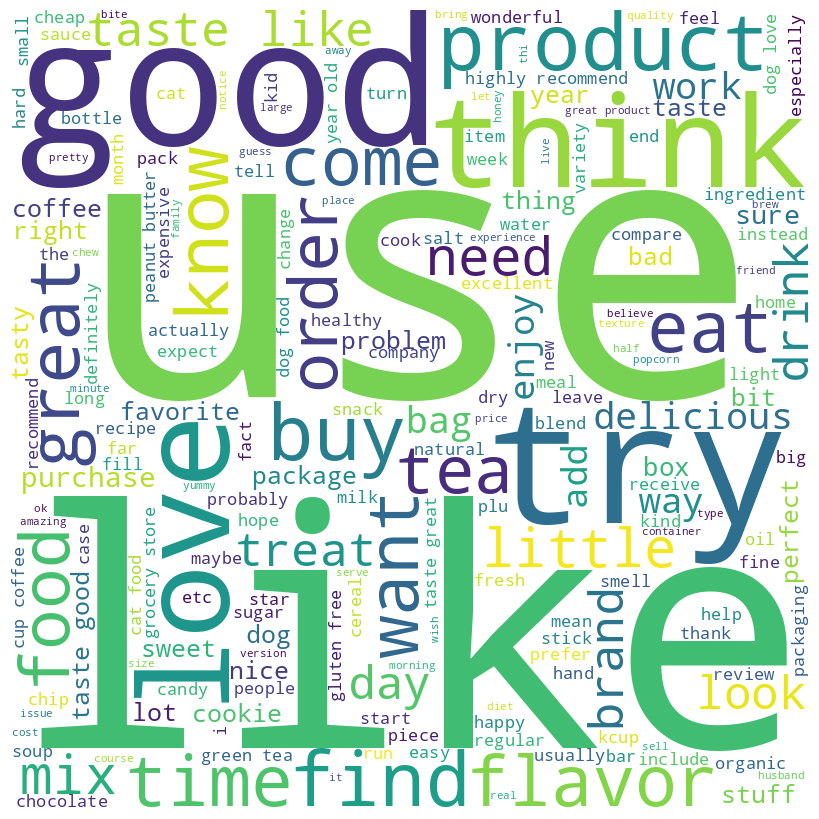

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create WordCloud from the 'cleaned_review' column
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=set(),
                      min_font_size=10).generate(' '.join(review['cleaned_review']))

# Plot WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 5. Perform N-gram Analysis on cleaned_ review
> First we need to tokenize the sentences before N-gram analysis

In [ ]:
# Tokenization
def tokenize(text):
    return [token.text for token in nlp(text)]


In [ ]:
# Apply tokenization to the 'cleaned_review' column
review['tokenized_text'] = review['cleaned_review'].apply(tokenize)

In [ ]:
review

,Score,Text,cleaned_review,tokenized_text
0,2,Apparently I am not the first customer to have...,apparently customer experience receive bottle ...,"[apparently, customer, experience, receive, bo..."
1,5,We bought the large cube because of our 97lb. ...,buy large cube lb german shepherd mix cattle d...,"[buy, large, cube, lb, german, shepherd, mix, ..."
2,5,"First off I have no idea how good these ""pods""...",idea good pod got live chat ask refund kcup or...,"[idea, good, pod, got, live, chat, ask, refund..."
3,5,I use the La Tienda Smoked Paprikas to make gr...,use la tienda smoke paprikas grilling rub mari...,"[use, la, tienda, smoke, paprikas, grilling, r..."
4,1,I must have gotten the scraps. My tree was ab...,scrap tree inch tall cross add water braid loo...,"[scrap, tree, inch, tall, cross, add, water, b..."
...,...,...,...,...
56840,5,This is the best price for hemp seed. I have ...,good price hemp seed hemp seed cost usd oz was...,"[good, price, hemp, seed, hemp, seed, cost, us..."
56841,5,These arrived fresh and have ordered 3 packs s...,arrive fresh order pack far great condition tasty,"[arrive, fresh, order, pack, far, great, condi..."
56842,4,I have used this Arrowhead Mills Brown Basmati...,use arrowhead mill brown basmati rice tasty st...,"[use, arrowhead, mill, brown, basmati, rice, t..."
56843,5,Dukie loves the sweet potato chicken wraps!!!<...,dukie love sweet potato chicken wraps!!!too ba...,"[dukie, love, sweet, potato, chicken, wraps!!!..."


# 5a. Visualize the 20 - most frequently occurring Bigrams and Trigrams

In [ ]:
# function to generate n-grams from a list of tokens
def generate_ngrams(tokens, n):
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [ ]:
# Apply tokenization to the 'cleaned_review' column
review['bigrams'] = review['tokenized_text'].apply(lambda x: generate_ngrams(x, 2))
review['trigrams'] = review['tokenized_text'].apply(lambda x: generate_ngrams(x, 3))


In [ ]:
# Flatten the lists of bigrams and trigrams
flat_bigrams = [item for sublist in review['bigrams'] for item in sublist]
flat_trigrams = [item for sublist in review['trigrams'] for item in sublist]


In [ ]:
# Get the most common bigrams and trigrams
top_bigrams = pd.Series(flat_bigrams).value_counts().head(20)
top_trigrams = pd.Series(flat_trigrams).value_counts().head(20)


In [ ]:
top_bigrams

taste like          3373
taste good          1793
highly recommend    1762
grocery store       1662
dog food            1484
green tea           1469
taste great         1417
peanut butter       1366
dog love            1333
gluten free         1222
cup coffee          1063
year old            1059
cat food            1046
great product        959
subscribe save       819
good price           796
tea bag              775
good taste           743
great taste          738
look like            734
dtype: int64

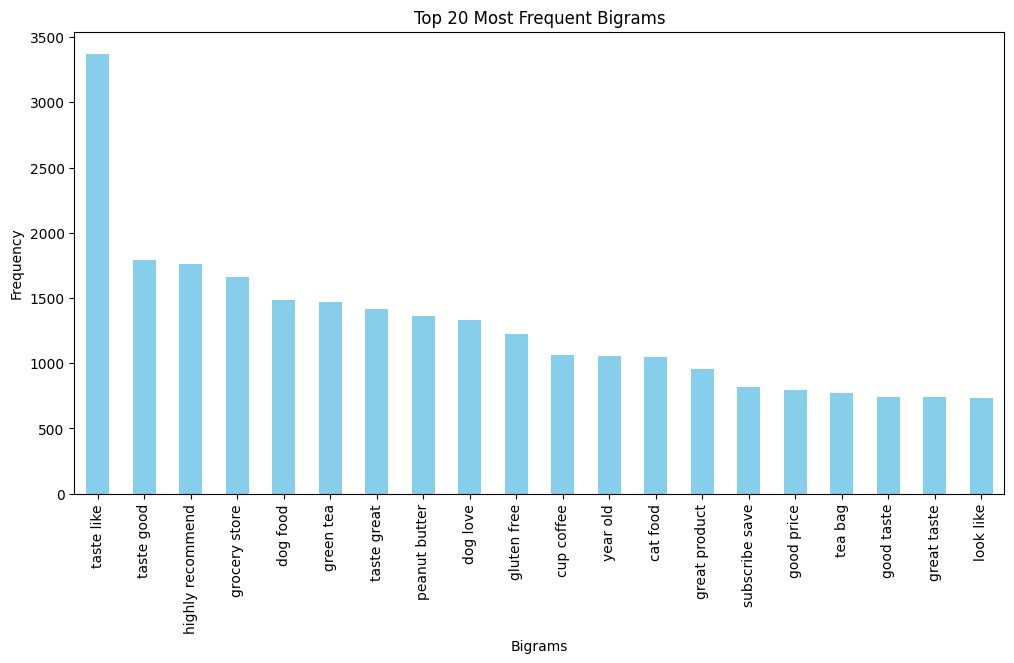

In [ ]:
# Plot the most common bigrams
plt.figure(figsize=(12, 6))
top_bigrams.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.show()

In [ ]:
top_trigrams

local grocery store         402
health food store           273
highly recommend product    205
high fructose corn          161
fructose corn syrup         159
bob red mill                143
dog love treat              134
taste like real             131
love love love              127
find grocery store          125
blue diamond almond         122
green mountain coffee       119
taste pretty good           118
amazon subscribe save       117
earl grey tea               117
chocolate chip cookie       115
dry dog food                109
local health food           108
good cup coffee             107
like strong coffee          106
dtype: int64

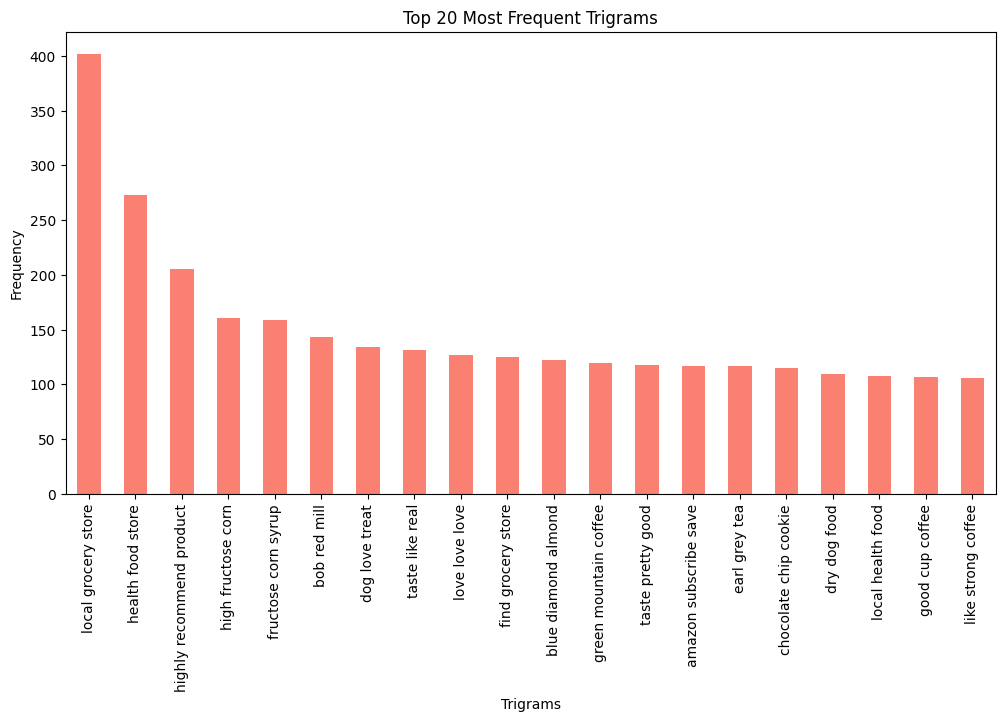

In [ ]:
# Plot the most common trigrams
plt.figure(figsize=(12, 6))
top_trigrams.plot(kind='bar', color='salmon')
plt.title('Top 20 Most Frequent Trigrams')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.show()

# 6. Create two objects X and y. X will be the 'cleaned_ review' column of Review data frame and y will be the ' Score' column.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X = review['cleaned_review']
y = review['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# 6a. Create a TFIDF object and split the data into training and testing sets. Train a Decision tree model and Display the confusion Matrix.

In [ ]:
# TFIDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Decision Tree models
dt_model_tfidf = DecisionTreeClassifier(random_state=42)
dt_model_tfidf.fit(X_train_tfidf, y_train)

# Predictions
y_pred_tfidf = dt_model_tfidf.predict(X_test_tfidf)

# Evaluate TFIDF model
print("Confusion Matrix (TFIDF):")
print(confusion_matrix(y_test, y_pred_tfidf))
print("\nClassification Report (TFIDF):")
print(classification_report(y_test, y_pred_tfidf))
print("\nAccuracy (TFIDF):", accuracy_score(y_test, y_pred_tfidf))

Confusion Matrix (TFIDF):
[[ 405   73   92  108  371]
 [ 114  127   63   85  219]
 [  94   67  205  126  377]
 [  88   60  132  467  886]
 [ 318  187  236  687 5782]]

Classification Report (TFIDF):
              precision    recall  f1-score   support

           1       0.40      0.39      0.39      1049
           2       0.25      0.21      0.23       608
           3       0.28      0.24      0.26       869
           4       0.32      0.29      0.30      1633
           5       0.76      0.80      0.78      7210

    accuracy                           0.61     11369
   macro avg       0.40      0.38      0.39     11369
weighted avg       0.60      0.61      0.61     11369


Accuracy (TFIDF): 0.6144779663998593


# 6b. Create a BoW object and split the data into training and testing sets. Train a decision tree model and Display the confusion Matrix.

In [ ]:
# BoW (Count Vectorizer)
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Train Decision Tree models
dt_model_bow = DecisionTreeClassifier(random_state=42)
dt_model_bow.fit(X_train_bow, y_train)

# Predictions
y_pred_bow = dt_model_bow.predict(X_test_bow)

# Evaluate BoW model
print("\nConfusion Matrix (BoW):")
print(confusion_matrix(y_test, y_pred_bow))
print("\nClassification Report (BoW):")
print(classification_report(y_test, y_pred_bow))
print("\nAccuracy (BoW):", accuracy_score(y_test, y_pred_bow))



Confusion Matrix (BoW):
[[ 428   79   94   97  351]
 [ 109  125   69   80  225]
 [  79   51  203  132  404]
 [ 104   67  123  444  895]
 [ 277  161  278  711 5783]]

Classification Report (BoW):
              precision    recall  f1-score   support

           1       0.43      0.41      0.42      1049
           2       0.26      0.21      0.23       608
           3       0.26      0.23      0.25       869
           4       0.30      0.27      0.29      1633
           5       0.76      0.80      0.78      7210

    accuracy                           0.61     11369
   macro avg       0.40      0.38      0.39     11369
weighted avg       0.60      0.61      0.60     11369


Accuracy (BoW): 0.6142140909490721


# 6c. Compare TFIDF and BoW
> So, as we can see for both object (TF-IDF and BoW) overall performance of the model decision tree are kind of same in our case.

> Though, the perfomance between TF-IDF and BoW depends on the specific characteristics of the dataset. Because, BoW calculates simply term frequency and TF-IDF is consist of invers document frequency.

> This is a class im-balance dataset, which has 5 different classes with different distribution.

>From the confusion matrix we can see that where the score is "5", those are predicted correctly because in the dataset majority of the portion around 60% are of score "5". While training process score "5" class of the data trained better, that's why precision, recall, and F1 score is also better for score "5" class.

# 7. Implement the HMM POS tagging on the first 2 rows of ‘cleaned_review’

In [ ]:
text_sample = review['cleaned_review'].head(2)

# Perform HMM POS tagging
pos_tags = []

for text in text_sample:
    doc = nlp(text)
    pos_tags.append([(token.text, token.pos_) for token in doc])

# Display POS tags for the first 2 rows
for i, tags in enumerate(pos_tags, 1):
    print(f"POS Tags for Row {i}:\n{tags}\n")

POS Tags for Row 1:
[('apparently', 'ADV'), ('customer', 'NOUN'), ('experience', 'NOUN'), ('receive', 'VERB'), ('bottle', 'NOUN'), ('light', 'ADJ'), ('red', 'ADJ'), ('wine', 'NOUN'), ('vinaigrette', 'NOUN'), ('instead', 'ADV'), ('red', 'PROPN'), ('wine', 'NOUN'), ('vinaigrette', 'NOUN'), ('dressing', 'VERB'), ('marinade', 'NOUN'), ('sure', 'ADJ'), ('amazon', 'NOUN'), ('send', 'VERB'), ('right', 'ADJ'), ('dressing', 'NOUN')]

POS Tags for Row 2:
[('buy', 'VERB'), ('large', 'ADJ'), ('cube', 'NOUN'), ('lb', 'ADJ'), ('german', 'ADJ'), ('shepherd', 'NOUN'), ('mix', 'NOUN'), ('cattle', 'NOUN'), ('dog', 'NOUN'), ('mix', 'NOUN'), ('lbs', 'PROPN'), ('love', 'NOUN'), ('thing', 'NOUN'), ('regular', 'ADJ'), ('dog', 'NOUN'), ('food', 'NOUN'), ('boy', 'NOUN'), ('race', 'NOUN'), ('play', 'VERB'), ('usually', 'ADV'), ('shepherd', 'PROPN'), ('boy', 'PROPN'), ('toy', 'PROPN'), ('monster', 'PROPN'), ('ball', 'NOUN'), ('recommend', 'VERB'), ('thing', 'NOUN'), ('beating', 'VERB'), ('couple', 'NOUN'), ('mon

# 8. Using the LDA algorithm create the Topics (Min 10) for the Corpus

In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import pandas as pd
import spacy

texts = [review.split() for review in review['Text']]

# Create a Dictionary from the texts
dictionary = Dictionary(texts)

# Create a Corpus from the texts
corpus = [dictionary.doc2bow(text) for text in texts]

# Build the LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=10,
                     random_state=42,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)




# 9. Compute the coherence score and print Topics Extracted.

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')



Coherence Score: 0.37531839017043916


In [ ]:
# Print the Topics Extracted
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.151*"are" + 0.090*"they" + 0.077*"them" + 0.074*"these" + 0.035*"They"')
(1, '0.047*"brands" + 0.046*"coconut" + 0.032*"Tea" + 0.028*"teas" + 0.019*"espresso"')
(2, '0.092*"her" + 0.085*"she" + 0.056*"cat" + 0.039*"cats" + 0.031*"She"')
(3, '0.036*"chocolate" + 0.028*"sugar" + 0.016*"milk" + 0.015*"low" + 0.015*"salt"')
(4, '0.070*"food" + 0.048*"dog" + 0.046*"he" + 0.031*"loves" + 0.026*"his"')
(5, '0.074*"I" + 0.064*"and" + 0.048*"to" + 0.037*"a" + 0.034*"it"')
(6, '0.048*"we" + 0.034*"We" + 0.031*"our" + 0.018*"free" + 0.012*"A"')
(7, '0.121*"the" + 0.043*"of" + 0.027*"that" + 0.022*"/><br" + 0.017*"about"')
(8, '0.021*"straight" + 0.012*"Stevia" + 0.011*"bags." + 0.009*"sweeteners" + 0.006*"salsa"')
(9, '0.069*"is" + 0.050*"of" + 0.046*"a" + 0.033*"the" + 0.028*"you"')


# 10. Visualize the topics

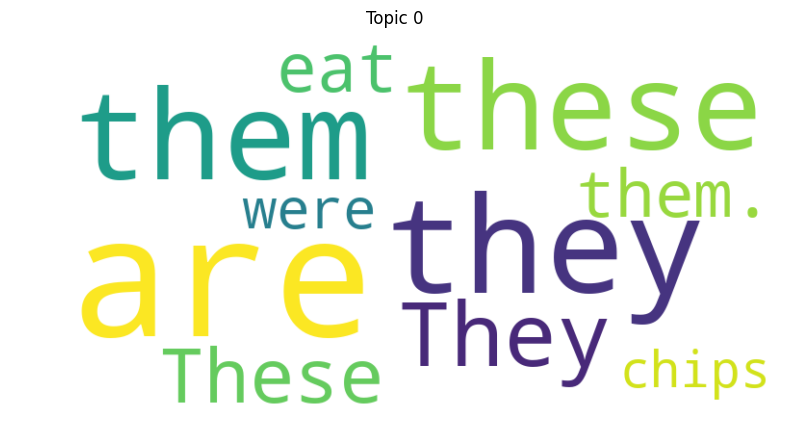

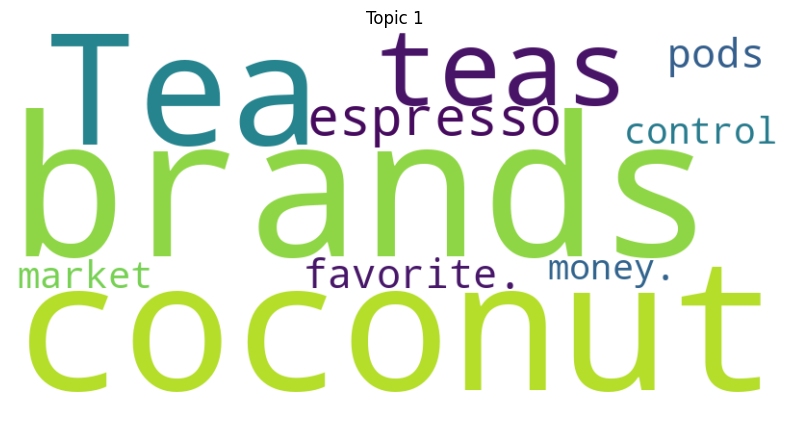

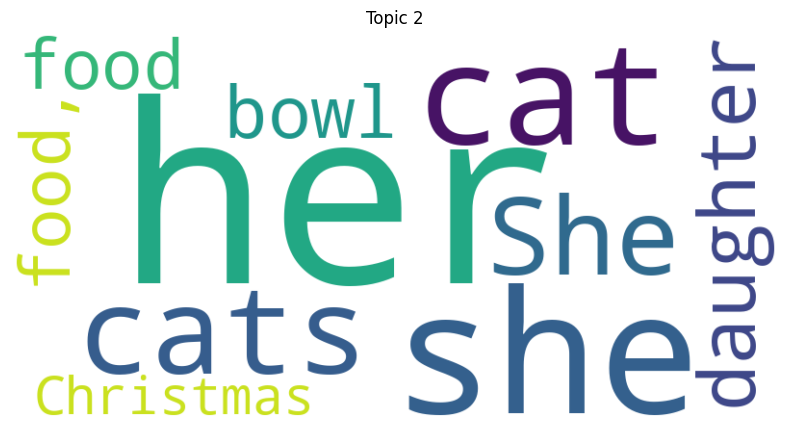

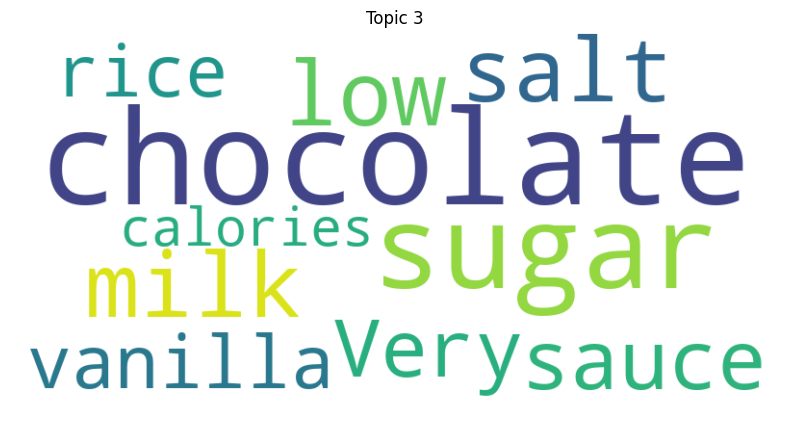

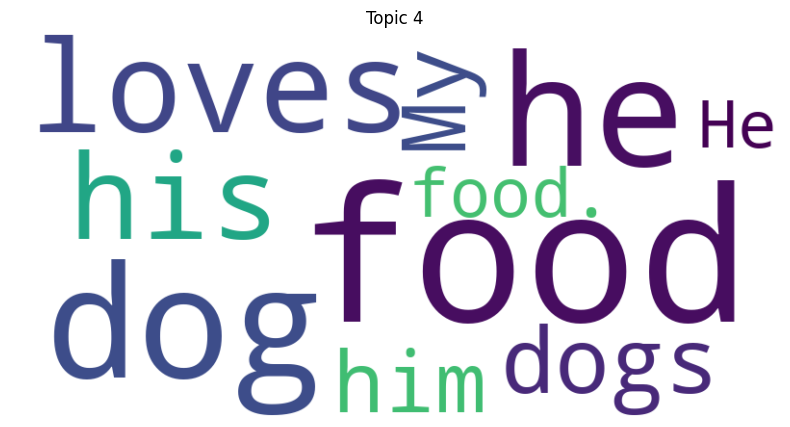

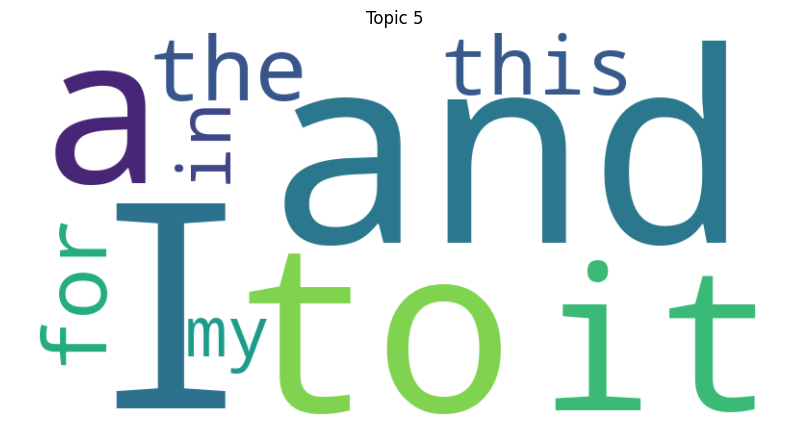

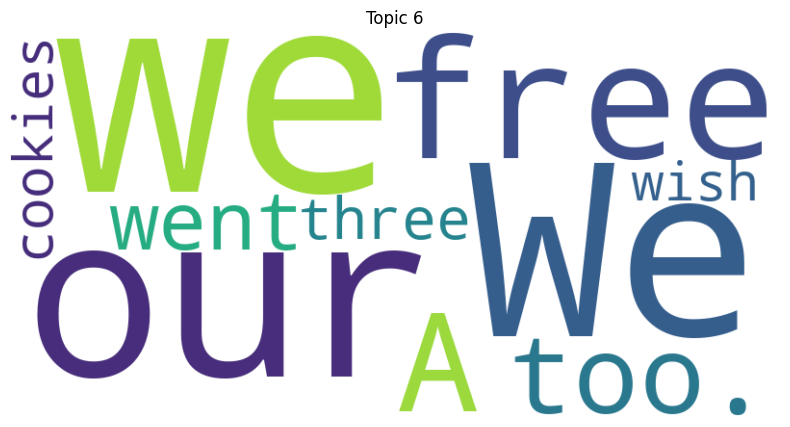

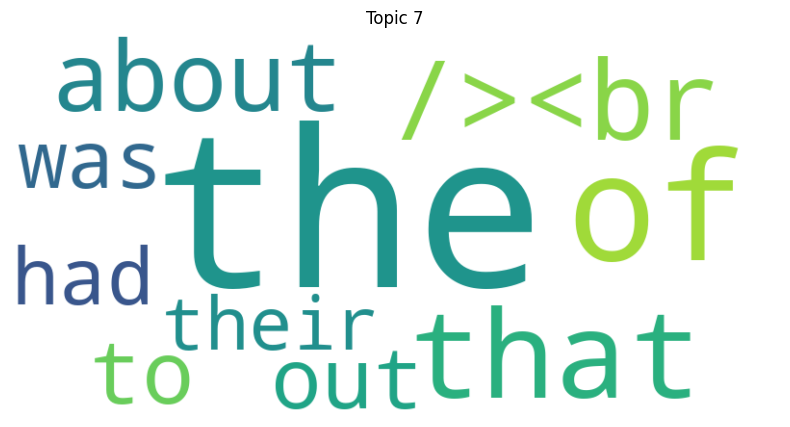

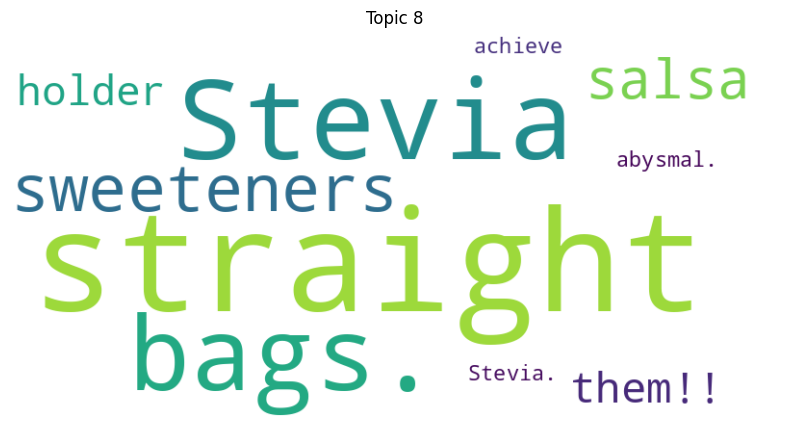

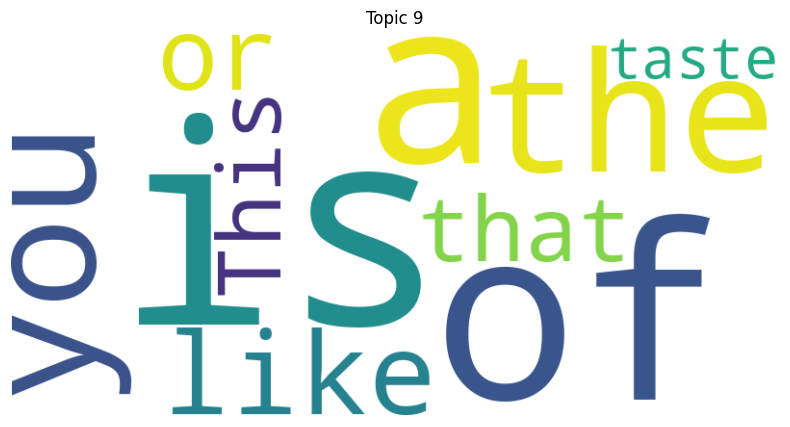

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the top words for each topic
topics = lda_model.show_topics(formatted=False, num_words=10)

for topic_id, words in topics:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))

    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_id}')
    plt.show()


# 11. Implement the dependency parser for any two random sentences from the entire corpus/dataset that has at least 10 words in the sentence. Make sure that dependency parser looks good and should visually understandable.

In [ ]:
from spacy import displacy
random_sentences = review.sample(2,random_state=42)['Text'].head(1)

for sentence in random_sentences:
    doc = nlp(sentence)

    print(f"Sentence: {sentence}\n")

    displacy.render(doc, style="dep", jupyter=True, options={'distance': 90, 'compact': True})

    print("\n" + "="*80 + "\n")


Sentence: We've tried many different kcups but find that Newman's Own-Decaf is our favorite. It is very smooth and great tasting.



In [ ]:
import spacy
from spacy import displacy
import random

sentences = review['Text'].sample(n=2, random_state=42).tolist()

for sentence in sentences:
    doc = nlp(sentence)

    displacy.render(doc, style="dep", jupyter=True, options={'distance': 90, 'compact': True})
